In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_train_image(image_id):
    df = pd.read_csv('../input/mnist-in-csv/mnist_train.csv')
    non_label_cols = [d for d in df.columns if d != 'label']
    image_data = df.iloc[image_id][non_label_cols].values
    reshaped_image = image_data.reshape((28, 28))

    return reshaped_image

def rotate_image(image, rotation_amount):
    angle = math.radians(rotation_amount)

    # Create the transformation matrix
    transformation_matrix = np.array([
        [math.cos(angle), math.sin(angle)],
        [-math.sin(angle), math.cos(angle)]
    ])

    height, width = image.shape

    center_height = round((height) / 2) - 1
    center_width = round((width) / 2) - 1

    new_width = round(abs(width * math.cos(angle)) + abs(height * math.sin(angle)))
    new_height = round(abs(height * math.cos(angle)) + abs(width * math.sin(angle)))

    new_center_height = round((new_height) / 2) - 1
    new_center_width = round((new_width) / 2) - 1
    
    output = np.zeros((new_height, new_width))

    for row in range(height):
        for column in range(width):
            # Represent positions as distance from center.
            x = row - center_height
            y = column - center_width

            # Transform vector
            new_position = transformation_matrix @ np.array([x, y])

            new_x, new_y = round(new_position[0]), round(new_position[1])

            # Revert to positions from top-left.
            new_x = new_center_height + new_x
            new_y = new_center_width + new_y

            if 0 <= new_y < new_height and 0 <= new_x < new_width:
                output[new_x, new_y] = image[row, column]
                
    return output

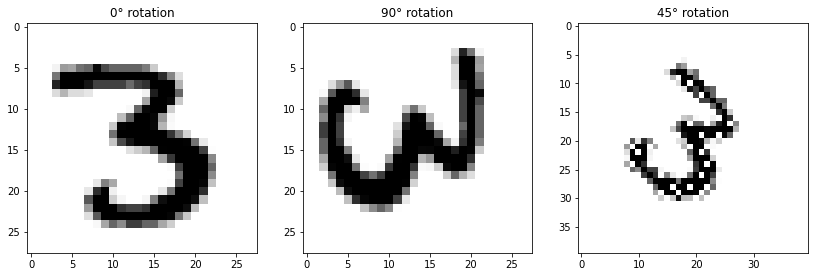

In [2]:
image = load_train_image(12)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 8))

ax1.imshow(rotate_image(image, 0), cmap='gray_r')
ax2.imshow(rotate_image(image, 90), cmap='gray_r')
ax3.imshow(rotate_image(image, 45), cmap='gray_r')

ax1.title.set_text('0° rotation')
ax2.title.set_text('90° rotation')
ax3.title.set_text('45° rotation')
plt.show()